# PCA 실습
### 이번 실습 시간에는 PCA 기법을 이용한 실습을 진행할 예정


## 1.1 Iris dataset
- K Nearest Neighbors 실습에 사용했던 아이리스 dataset을 이용
- 붓꽃 종류별로 꽃받침과 꽃잎의 길이 및 너비를 측정한 데이터
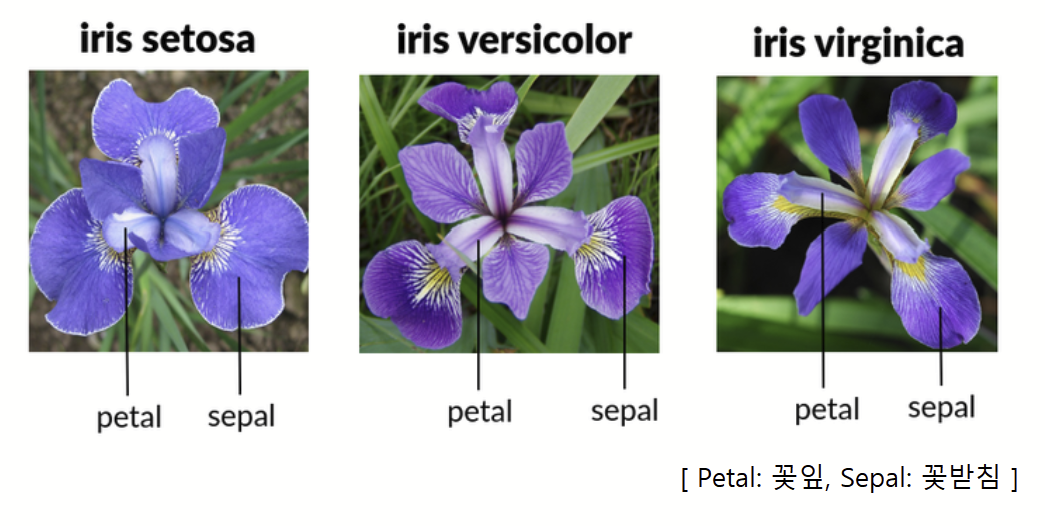

### 1.1 데이터셋 링크
https://archive.ics.uci.edu/ml/datasets/Iris

이 링크에서 데이터의 특성을 볼 수 있음.

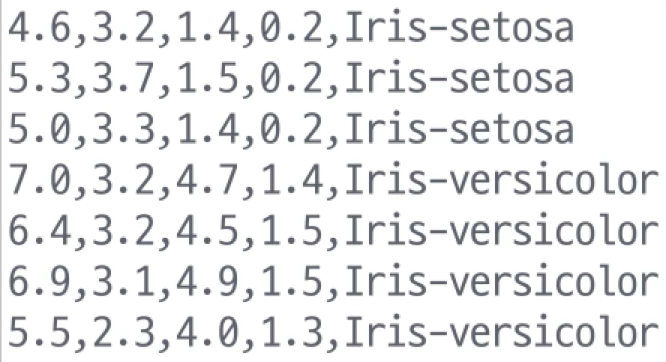

# 1.2 scikit-learn의 load_iris를 활용하여 data 불러오기

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
print(iris['data'].shape)

(150, 4)


## 1.3 scikit-learn의 PCA class 이용
- sklearn.decomposition에 들어있는 PCA class 이용
- n_components: 사용할 주성분의 개수
- PCA.explained_variance_: 각 주성분이 데이터의 총 분산 중 얼마나 커버를 하는지에 대한 수치를 확인 가능
- PCA.explained_variance_ratio_: 각 주성분이 데이터의 총 분산 중 얼마나 커버 하는지에 대한 비율 확인 가능

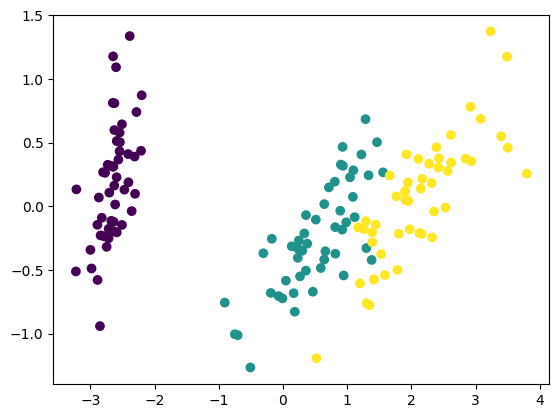

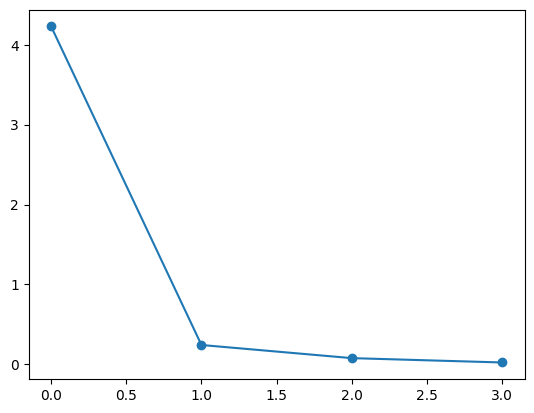

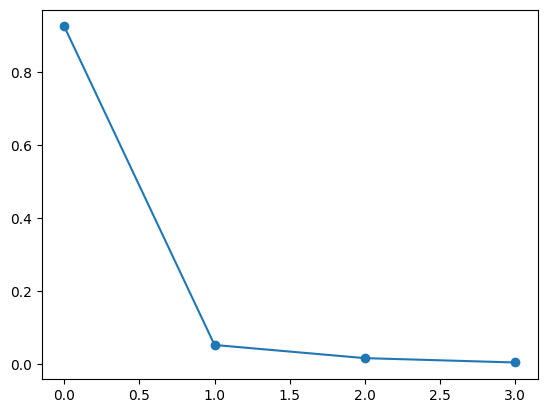

[0.92461872 0.05306648 0.01710261 0.00521218]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=4)

Y = pca.fit_transform(iris.data)

plt.scatter(Y[:,0], Y[:,1], c=iris.target)
plt.show()

plt.plot(pca.explained_variance_, "-o")
plt.show()

plt.plot(pca.explained_variance_ratio_, "-o")
plt.show()

print(pca.explained_variance_ratio_)



## 2.1 PCA via Eigen Decomposition
- Covariance Matrix를 Eigen Decomposition해서 주성분을 찾음
- nxn covariance matrix C를 다음 조건에 맞게 분해
  - Q: nxn 크기의 Orthogonal Matrix (eigenvector들로 구성)
  - D: nxn 크기의 Diagonal Matrix (eigenvalue들로 구성)
  - ## $C= QDQ^\top$

## 2.2 Covariance Matrix를 계산하는 법!
### 데이터 X가 (n,d) 사이즈의 matrix로 구성되어 있다고 가정
- n은 총 데이터의 개수
- d는 데이터의 차원
### Covariance matrix C는 아래와 같이 계산 가능
##$C = \frac{1}{n}(X-\bar{X})^\top (X-\bar{X})$
- $\bar{X}=\frac{1}{n}\sum_{i=1}^n x_i$
### Eigen Decomposition은 numpy의 linalg를 이용하여 계산 가능

In [ ]:
from numpy import linalg
import matplotlib.pyplot as plt

X = iris.data
X = X - X.mean(axis=0) # X에서 데이터 차원으로 평균을 낸 값을 빼줌

C = (X.T @ X)/X.shape[0]  # 평균을 빼준 값을 1/n*X^TX을 계산해줌
D, Q = linalg.eigh(C)

print("D: ", D)
print("Q: ", Q)

D:  [0.02367619 0.0776881  0.24105294 4.20005343]
Q:  [[ 0.31548719  0.58202985  0.65658877 -0.36138659]
 [-0.3197231  -0.59791083  0.73016143  0.08452251]
 [-0.47983899 -0.07623608 -0.17337266 -0.85667061]
 [ 0.75365743 -0.54583143 -0.07548102 -0.3582892 ]]


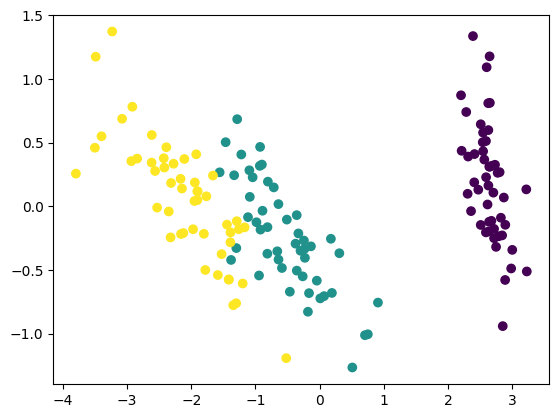

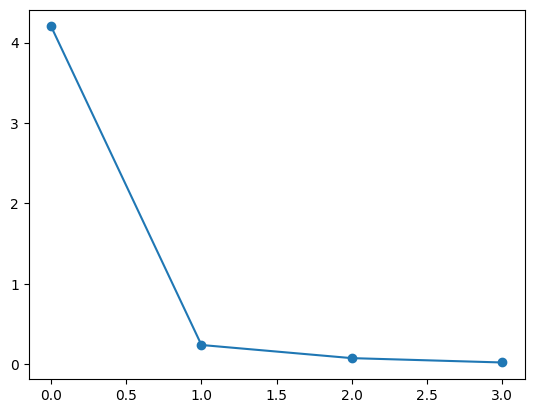

In [ ]:
plt.scatter(X@Q[:,3], X@Q[:,2], c=iris.target)
plt.show()

plt.plot(sorted(D, reverse=True), "-o")
plt.show()

## 3.1 PCA via SVD
### Singular Value Decomposition을 이용하여 PCA 진행하기
- mxn 행렬 X를 다음 조건에 맞게 분해
- U: mxm 크기의 Orthogonal matrix
- D: mxn 크기의 Diagonal matrix
- V: nxn 크기의 Orthogonal matrix
- ## $X=UDV^\top$
### `numpy.linalg.svd()`를 이용하여 데이터를 넣어주면 자동으로 U, D, $V^\top$을 얻을 수 있음

### Eigen Decomposition과의 관계
##$X^\top X = (UDV^\top)^\top UDV^\top = VD^\top U^\top UDV^\top = VD^2V^\top$
- 즉, SVD를 통해서 $D$와 $V$를 찾는 것이 Eigen Decomposition에서 $D^{1/2}$과 $Q$를 찾는 것과 동치

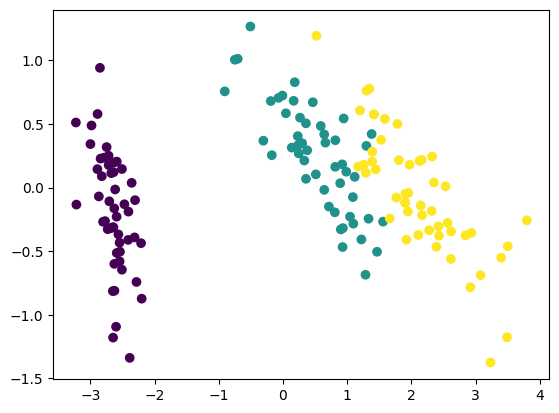

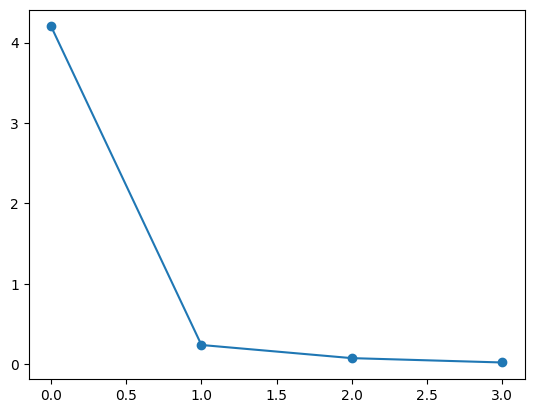

In [ ]:
from numpy import linalg

X = iris.data
X = X - X.mean(axis=0)

U, S, VT = linalg.svd(X)

plt.scatter(X@VT[0], X@VT[1], c=iris.target)
plt.show()

variances = (S**2)/X.shape[0]
plt.plot(variances, "-o")
plt.show()

## 4.1 PCA via Power Method
- 데이터의 수가 너무 많은 경우 직접 Eigen decomposition이나 SVD를 하는 것이 불가
- 이를 해결하기 위해 power method를 통해 직접 가장 큰 eigenvalue를 찾을 수 있음
- 한 번의 power method를 통해서 가장 큰 eigenvalue $\lambda$와 eigenvector $v$를 찾을 수 있음
# $v = \frac{Mv}{\|Mv\|}$
# $\lambda = \frac{v^\top Mv}{v^\top v}$ or $\lambda = \|Mv\|$
- 이를 통해 아래의 방식으로 새로운 matrix를 만들고 그 matrix를 이용하여 다음으로 큰 eigenvalue $\lambda'$와 eigenvector $v'$를 찾을 수 있음
#$M_{\text{new}} = M - \lambda vv^\top$

In [ ]:
from numpy import linalg
import matplotlib.pyplot as plt
import numpy as np

x = iris.data
x = x - x.mean(axis=0)

# covariance matrix
C = (x.T@x) / x.shape[0]

v = np.random.randn(C.shape[0], 1)
v = v / linalg.norm(v) # v의 norm size로 normalize, linalg.norm 함수 이용

M = C.copy()

L= []
Q= []

for dim in range(4):
  for epoch in range(20):
    vp = M@v
    lmd = linalg.norm(vp) # lambda value는 Mv의 norm size와 같다
    vp = vp / lmd # normalize by lambda
    v = vp

  M = M - lmd * (v@v.T)
  L.append(lmd)
  Q.append(v)

L = np.array(L)
Q = np.hstack(Q)

print("L: ", L)
print("Q: ", Q)


L:  [4.20005343 0.24105294 0.0776881  0.02367619]
Q:  [[ 0.36138659  0.65658877 -0.58202985 -0.31548719]
 [-0.08452251  0.73016143  0.59791083  0.3197231 ]
 [ 0.85667061 -0.17337266  0.07623608  0.47983899]
 [ 0.3582892  -0.07548102  0.54583143 -0.75365743]]
